# Twitch-Review-Audit: Advanced Data Visualization & Insights
[![Plotting: Seaborn/Matplotlib](https://img.shields.io/badge/Library-Seaborn-orange.svg)](#)

## Executive Summary
This notebook represents the analytical and interpretability layer of the Twitch Review Audit pipeline. 
Advanced visualization techniques are employed to explore dataset characteristics, annotation consistency, 
and potential data quality issues, including:

1. **Sentiment Distribution** via Donut Charts.
2. **Inter-Source Agreement Patterns** via Normalized Confusion Matrices.
3. **Lexical Contribution Analysis** via Sentiment-specific Word Clouds.
4. **Data Quality Diagnostics** via Label Noise Mapping.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix

# Load Audited Data
df = pd.read_csv('twitch_reviews_audited.csv')

# Professional Plotting Config
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("notebook", font_scale=1.2)
colors = ["#ff4b4b", "#ffcc00", "#1db954"] # Twitch-ish color palette (Red, Yellow, Green)

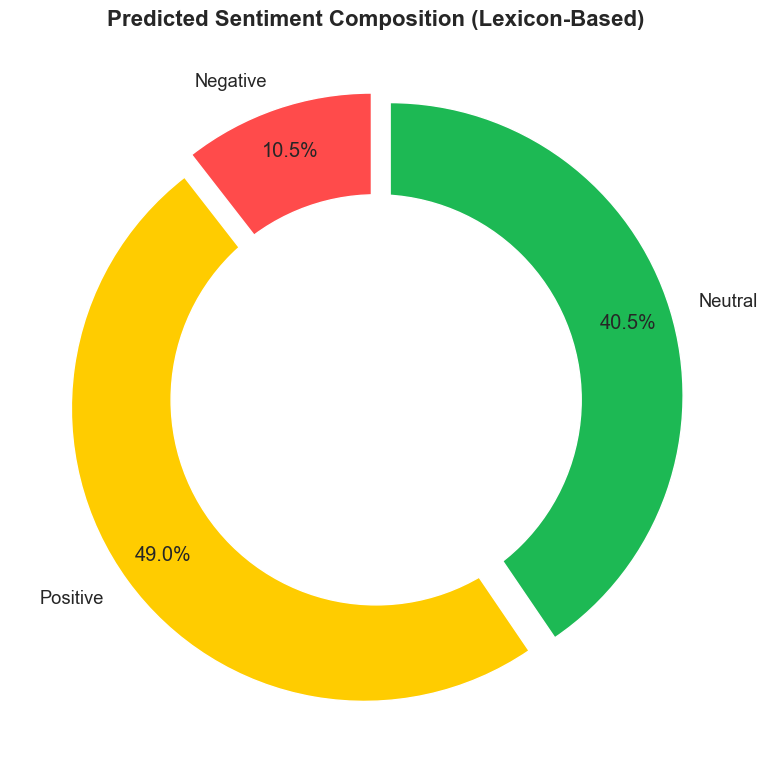

In [18]:
# Prepare data
counts = df['label_lexicon'].value_counts().sort_index()
labels = ['Negative', 'Positive', 'Neutral']
sizes = [counts[0], counts[1], counts[2]]

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, 
        pctdistance=0.85, explode=(0.05, 0.05, 0.05))

# Draw circle for Donut effect
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.title('Predicted Sentiment Composition (Lexicon-Based)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

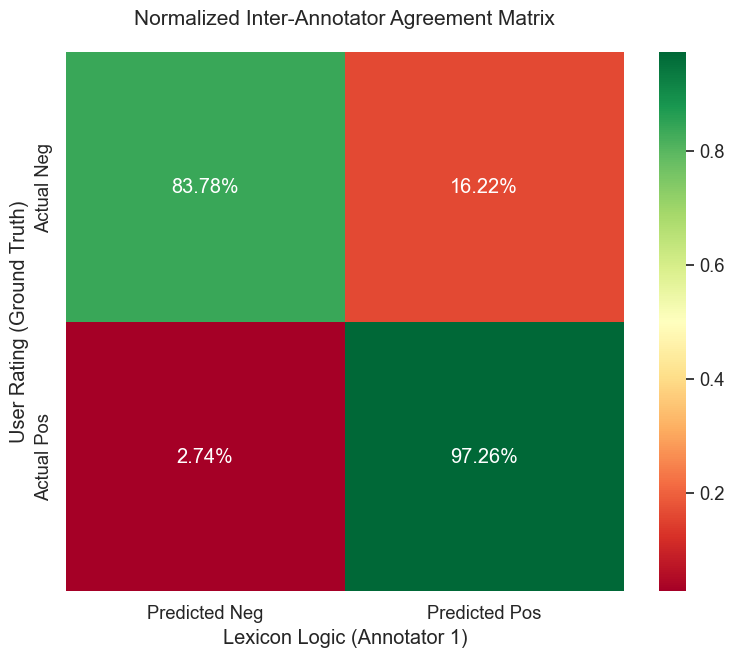

In [19]:
# Filtering non-neutral
df_val = df[(df['label_lexicon'] != 2) & (df['label_original'] != 2)]
cm = confusion_matrix(df_val['label_original'], df_val['label_lexicon'], normalize='true')

plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='RdYlGn', 
            xticklabels=['Predicted Neg', 'Predicted Pos'], 
            yticklabels=['Actual Neg', 'Actual Pos'])

plt.title('Normalized Inter-Annotator Agreement Matrix', fontsize=15, pad=20)
plt.ylabel('User Rating (Ground Truth)')
plt.xlabel('Lexicon Logic (Annotator 1)')
plt.show()

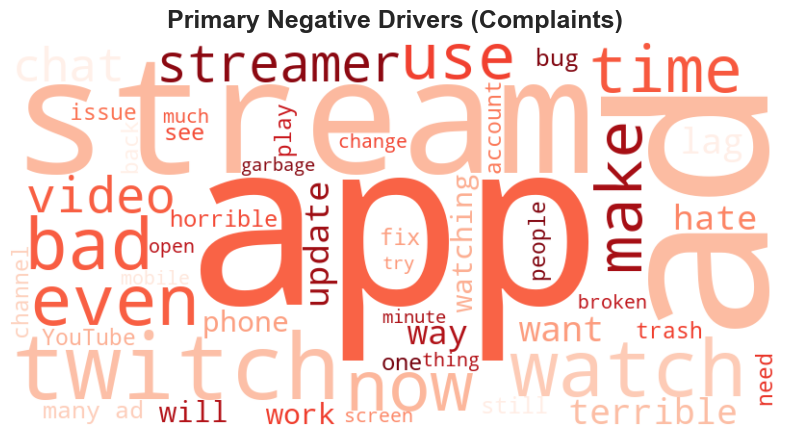

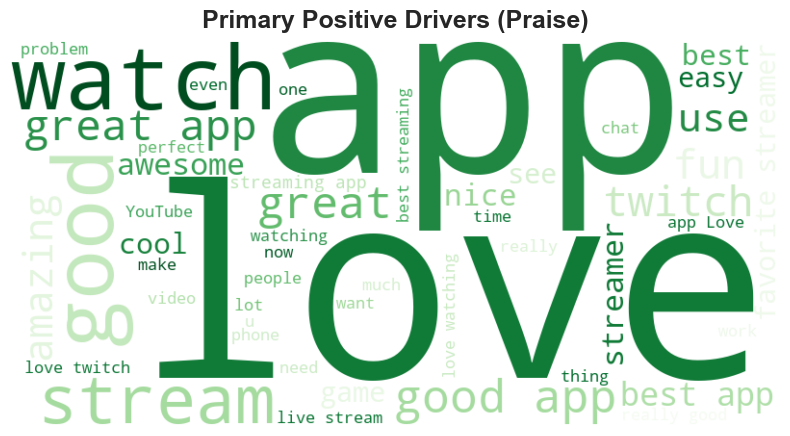

In [20]:
def generate_cloud(label, title, color_map):
    text = " ".join(df[df['label_lexicon'] == label]['content'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          colormap=color_map, max_words=50).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18, fontweight='bold', pad=10)
    plt.axis('off')
    plt.show()

# Generate for Negative (0) and Positive (1)
generate_cloud(0, "Primary Negative Drivers (Complaints)", "Reds")
generate_cloud(1, "Primary Positive Drivers (Praise)", "Greens")

C:\Users\Marcell\AppData\Local\Temp\ipykernel_17056\2424824083.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=noise_data.index.map({True: 'Label Noise', False: 'Consistent Data'}),


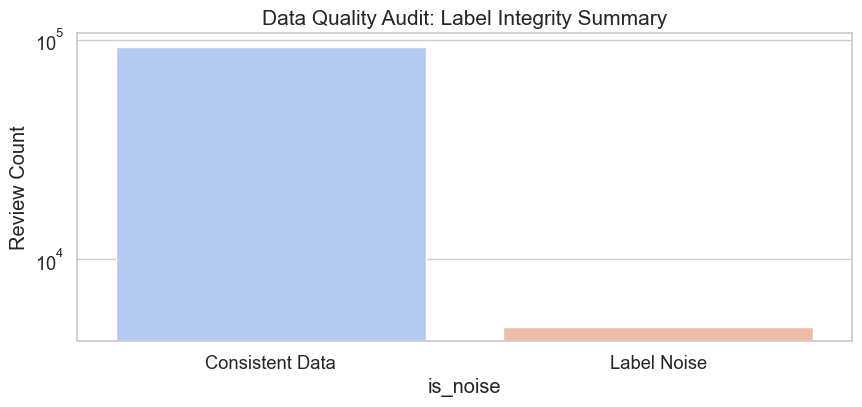

In [21]:
noise_data = df['is_noise'].value_counts()

plt.figure(figsize=(10, 4))
sns.barplot(x=noise_data.index.map({True: 'Label Noise', False: 'Consistent Data'}), 
            y=noise_data.values, palette='coolwarm')

plt.title('Data Quality Audit: Label Integrity Summary', fontsize=15)
plt.ylabel('Review Count')
plt.yscale('log') # Menggunakan skala log agar Noise yang kecil tetap terlihat jelas
plt.show()